# LUCAS
> Accessing and bundling [LUCAS-EC](https://esdac.jrc.ec.europa.eu/projects/lucas) NIRS dataset

The KSSL MIRS/NIRS database is only available on request to USDA/KSSL for now. The following utilities assume you have the database locally (both the Microsoft Access database and Bruker Optics MIRS and NIRS scans).

In [ ]:
#| default_exp data.external.lucas

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| export
from fastcore.basics import patch
from fastcore.xtras import mkdir
from fastcore.foundation import L
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from typing import Dict, Callable
import matplotlib.pyplot as plt

In [ ]:
src_dir = Path.home() / 'pro/data'
fname_analytes = src_dir / 'lucas-ec-2015/LUCAS2015_topsoildata_20200323/LUCAS_Topsoil_2015_20200323.csv'
src_dir_spectra = src_dir / 'lucas-ec-2015/LUCAS2015_spectra/LUCAS2015_Soil_Spectra_EU28'
dest_dir = '../_data/lucas-vnir'

In [ ]:
def select_cols(df, idxs=['PointID', 'SampleID'], wl_range=['500', '2450']):
    start, end = [df.columns.get_loc(wl) for wl in wl_range]
    return idxs + list(df.columns[start:end+1].values)

In [ ]:
def read_spectra(path, idxs=['PointID', 'SampleID'], **kwargs):
    dfs = []
    for path in src_dir_spectra.ls():
        dfs.append(pd.read_csv(path))
    df = pd.concat(dfs)
    cols = select_cols(df, idxs, **kwargs)
    return df[cols].set_index(idxs) 

df_sp = read_spectra(src_dir_spectra)

In [ ]:
df_sp.head()

500     500.5       501     501.5       502     502.5  \
PointID  SampleID                                                               
50422798 30001_1   0.950293  0.949310  0.948321  0.947327  0.946327  0.945322   
         30001_2   0.952309  0.951319  0.950324  0.949323  0.948317  0.947307   
50362788 30002_1   1.019130  1.018188  1.017241  1.016289  1.015331  1.014367   
         30002_2   1.017504  1.016565  1.015622  1.014672  1.013717  1.012757   
50342794 30003_1   0.948406  0.947436  0.946460  0.945479  0.944493  0.943502   

                        503     503.5       504     504.5  ...    2445.5  \
PointID  SampleID                                          ...             
50422798 30001_1   0.944309  0.943287  0.942255  0.941216  ...  0.496443   
         30001_2   0.946292  0.945268  0.944236  0.943199  ...  0.499957   
50362788 30002_1   1.013397  1.012422  1.011441  1.010455  ...  0.485443   
         30002_2   1.011790  1.010814  1.009832  1.008846  ...  0.484452   
50342794 30003_1   0.942502  0.941497  0.940485  0.939468  ...  0.485603   

                       2446    2446.5      2447    2447.5      2448    2448.5  \
PointID  SampleID                                                               
50422798 30001_1   0.496726  0.497006  0.497282  0.497554  0.497820  0.498082   
         30001_2   0.500235  0.500504  0.500768  0.501026  0.501279  0.501531   
50362788 30002_1   0.485722  0.485995  0.486262  0.486523  0.486777  0.487026   
         30002_2   0.484718  0.484979  0.485234  0.485485  0.485733  0.485980   
50342794 30003_1   0.485882  0.486152  0.486416  0.486674  0.486928  0.487180   

                       2449    2449.5      2450  
PointID  SampleID                                
50422798 30001_1   0.498340  0.498595  0.498846  
         30001_2   0.501782  0.502031  0.502279  
50362788 30002_1   0.487272  0.487517  0.487762  
         30002_2   0.486226  0.486473  0.486722  
50342794 30003_1   0.487431  0.487682  0.487934  

[5 rows x 3901 columns]

In [ ]:
# keep only whole wavelength (to be compatible with KSSL VNIR spectra
cols_of_interest = [c for c in df_sp.columns if not '.' in c]
df_sp = df_sp[cols_of_interest]

In [ ]:
df_sp.head()

500       501       502       503       504       505  \
PointID  SampleID                                                               
50422798 30001_1   0.950293  0.948321  0.946327  0.944309  0.942255  0.940172   
         30001_2   0.952309  0.950324  0.948317  0.946292  0.944236  0.942157   
50362788 30002_1   1.019130  1.017241  1.015331  1.013397  1.011441  1.009464   
         30002_2   1.017504  1.015622  1.013717  1.011790  1.009832  1.007854   
50342794 30003_1   0.948406  0.946460  0.944493  0.942502  0.940485  0.938446   

                        506       507       508       509  ...      2441  \
PointID  SampleID                                          ...             
50422798 30001_1   0.938070  0.935949  0.933824  0.931697  ...  0.493731   
         30001_2   0.940059  0.937941  0.935819  0.933695  ...  0.497188   
50362788 30002_1   1.007468  1.005453  1.003433  1.001413  ...  0.482771   
         30002_2   1.005856  1.003839  1.001817  0.999794  ...  0.481790   
50342794 30003_1   0.936388  0.934310  0.932229  0.930145  ...  0.482778   

                       2442      2443      2444      2445      2446      2447  \
PointID  SampleID                                                               
50422798 30001_1   0.494348  0.494959  0.495562  0.496153  0.496726  0.497282   
         30001_2   0.497827  0.498459  0.499077  0.499671  0.500235  0.500768   
50362788 30002_1   0.483384  0.483988  0.484579  0.485159  0.485722  0.486262   
         30002_2   0.482408  0.483019  0.483612  0.484179  0.484718  0.485234   
50342794 30003_1   0.483437  0.484086  0.484716  0.485316  0.485882  0.486416   

                       2448      2449      2450  
PointID  SampleID                                
50422798 30001_1   0.497820  0.498340  0.498846  
         30001_2   0.501279  0.501782  0.502279  
50362788 30002_1   0.486777  0.487272  0.487762  
         30002_2   0.485733  0.486226  0.486722  
50342794 30003_1   0.486928  0.487431  0.487934  

[5 rows x 1951 columns]

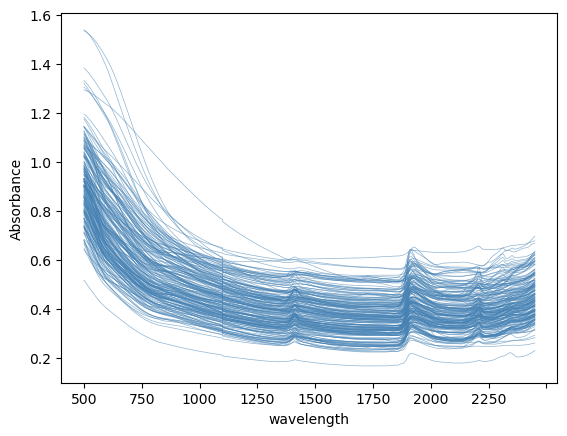

In [ ]:
df_sp.sample(n=200).T.plot(kind='line', lw=0.5, legend=False, c='steelblue', alpha=0.6)
plt.xlabel('wavelength')
plt.ylabel('Absorbance');

In [ ]:
def read_analytes(path):
    return pd.read_csv(path)

df_an = read_analytes(fname_analytes)

In [ ]:
df_an.columns

Index(['Point_ID', 'Revisited_point', 'Coarse', 'Clay', 'Sand', 'Silt',
       'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'Elevation',
       'LC1', 'LU1', 'Soil_Stones', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3',
       'LC1_Desc', 'LU1_Desc', '725'],
      dtype='object')

In [ ]:
df_an['K'].describe()

count    21859.000000
mean       195.529677
std        232.383766
min          0.000000
25%         77.500000
50%        143.100000
75%        245.600000
max      10030.900000
Name: K, dtype: float64

In [ ]:
# Unit conversion

# Create a column named '725' (id of Kex analyte in USDA/KSSL) in the cmol(+)/kg
df_an['725'] = df_an['K'] / (39.0983*10)

In [ ]:
def bundle(
    df_target:pd.DataFrame, # Analytes to be used as target
    df_features:pd.DataFrame, # Spectra to be used as features
    dest_dir:str, # Destination directory
    analytes:list=['Coarse', 'Clay', 'Sand', 'Silt',
                   'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC',
                   'CaCO3', 'P', 'N', 'K', '725'], # Analytes of interest    
):
    """Bundle LUCAS dataset as follows:
        - /dest_dir/
        -          /point_id/
                             spectra1.csv
                             spectra2.csv
        -                    target.csv
    """
    dest_dir = Path(dest_dir)        
    mkdir(dest_dir, overwrite=True)
    missing_spectra = []
    for index, row in tqdm(df_target.iterrows(), total=df_target.shape[0]):
        try:
            reps = df_features.loc[row['Point_ID'], :]
            
            # create path
            path = dest_dir / str(row['Point_ID'])
            if not path.exists(): path.mkdir()
                
            # create target.csv
            target = row[analytes]
            target.index.name = 'analyte'
            target.name = 'value'
            target.to_csv(path/'target.csv')

            # create spectra_xx.csv replicates
            for idx, rep in reps.iterrows():
                out_fname = path / (idx + '.csv')
                rep.name = 'absorbance'
                rep.index.name = 'wavelength'
                rep.to_csv(out_fname)

        except KeyError:
            missing_spectra.append(row["Point_ID"])
            
    return missing_spectra

In [ ]:
missing_spectra = bundle(df_an, df_sp, dest_dir)

100%|█████████████████████████████████████████████████████████| 21859/21859 [01:06<00:00, 330.24it/s]


In [ ]:
len(missing_spectra)

77